In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('C:\\Users\\mohdz\\OneDrive\\Desktop\\Carbon_Prediction_LSTM\\data\\processed\\co2_world.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [3]:
train = df.iloc[:-12]
test = df.iloc[-12:]


In [4]:
model = LinearRegression()
model.fit(np.array(range(len(train))).reshape(-1, 1), train)

LinearRegression()

In [5]:
test_predictions = model.predict(np.array(range(len(train), len(train)+len(test))).reshape(-1, 1))
train_predictions = model.predict(np.array(range(0, len(train))).reshape(-1,1))

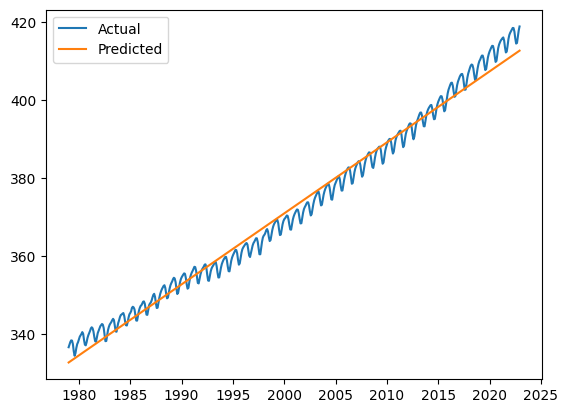

In [6]:
plt.plot(df.index, df['co2'], label='Actual')
plt.plot(np.concatenate((train.index.to_numpy(), test.index.to_numpy())),np.concatenate((train_predictions, test_predictions)), label='Predicted')
plt.legend()
plt.show()

In [7]:
train_score = np.sqrt(np.mean(np.square(train - train_predictions)))
test_score = np.sqrt(np.mean(np.square(test - test_predictions)))
print('Train Score: %.2f RMSE' % (train_score))
print('Test Score: %.2f RMSE' % (test_score))

Train Score: 2.72 RMSE
Test Score: 5.53 RMSE


c:\Users\mohdz\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\mohdz\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [8]:
future_dates = pd.date_range(start='2020-01-01', end='2030-01-01', freq='MS')


In [9]:
future_positions = np.array(range(len(df), len(df)+len(future_dates))).reshape(-1, 1)
future_predictions = model.predict(future_positions)


In [10]:
future_df = pd.DataFrame({'date': future_dates.ravel(), 'co2': future_predictions.ravel()})
future_df.set_index('date', inplace=True)



C:\Users\mohdz\AppData\Local\Temp\ipykernel_7412\3890493186.py:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  future_df = pd.DataFrame({'date': future_dates.ravel(), 'co2': future_predictions.ravel()})


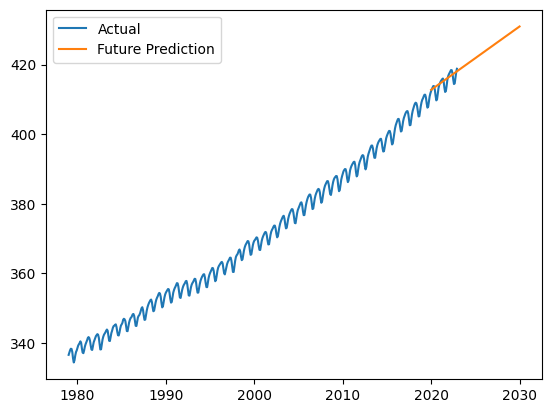

In [11]:
plt.plot(df.index, df['co2'], label='Actual')
plt.plot(future_df.index, future_df['co2'], label='Future Prediction')
plt.legend()
plt.show()
